<a href="https://colab.research.google.com/github/vitalouivi/ALGORITHMS/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%D0%BD%D0%BE%D0%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1
#### По данным по Великобритании о потреблении цыплят ($Y$), среднедушевом доходе ($X1$), стоимости одного фунта цыплят ($X2$), стоимости одного фунта свинины ($X3$) и стоимости одного фунта говядины ($X4$)
#### a) Необходимо построить, сравнить и проинтерпретировать уравнения регрессии вида:

$1)  \hat{y} = b_0 \cdot x_2^{b_2}$  (Функция спроса)\
$2)  \hat{y} = b_0 \cdot x_1^{b_1}$  (Функция потребления)\
$3)  \hat{y} = b_0 \cdot x_1^{b_1} \cdot x_2^{b_2}$  (Функция спроса-потребления)\
$4)  \hat{y} = b_0 \cdot x_2^{b_2} \cdot x_3^{b_3} \cdot x_4^{b_4}$  (Функция спроса с учетом цены на товары-заменители)

#### b) Применить тест Шапиро-Уилка для проверки нормальности распределения $X1, X2, X3, X4$

#### c) Для данных из пункта b, которые не прошли проверку, применить преобразования Бокса-Кокса.

#### d) Применить критерий Манна-Уитни для оценки различий данных $X3$ и $X4$. Дать интерпретацию.

#### e) Применить критерий Флигнера-Клипера для $X2$ и $X3$. Применить критерий Стьюдента для этих данных с учетом полученных результатов. Привести интерпретацию.


#### Исходные данные для исследования приведены в табл. 1

Таблица 1: Исходные данные
```plaintext
| t  | Y     | X1     | X2    | X3    | X4    |
|----|-------|--------|-------|-------|-------|
| 1  | 31.2  | 492.9  | 37.3  | 54.7  | 77.4  |
| 2  | 33.3  | 528.6  | 38.1  | 63.7  | 80.2  |
| 3  | 35.6  | 560.3  | 39.3  | 69.8  | 80.4  |
| 4  | 36,4  | 624.6  | 37.8  | 65.9  | 83.9  |
| 5  | 36.7  | 666.4  | 38.4  | 64.5  | 85.5  |
| 6  | 38.4  | 717.8  | 40.1  | 70.0  | 93.7  |
| 7  | 40.4  | 768.2  | 38.6  | 73.2  | 106.1 |
| 8  | 40.3  | 843.3  | 39.8  | 67.8  | 104.8 |
| 9  | 41.8  | 911.6  | 39.7  | 79.1  | 114.0 |
| 10 | 40.4  | 931.1  | 52.1  | 95.4  | 124.1 |
| 11 | 40.7  | 1021.5 | 48.9  | 94.2  | 127.6 |
| 12 | 40.1  | 1165.9 | 58.3  | 123.5 | 142.9 |
| 13 | 42.7  | 1349.6 | 57.9  | 129.9 | 143.6 |
| 14 | 44.1  | 1449.4 | 56.5  | 117.6 | 139.2 |
| 15 | 46.7  | 1575.5 | 63.7  | 130.9 | 165.5 |
| 16 | 50.6  | 1759.1 | 61.6  | 129.8 | 203.3 |
| 17 | 50.1  | 1994.2 | 58.9  | 128.0 | 219.6 |
| 18 | 51.7  | 2258.1 | 66.4  | 141.0 | 221.6 |
| 19 | 52.9  | 2478.7 | 70.4  | 168.2 | 232.6 |
```




In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from scipy.stats import shapiro, boxcox, mannwhitneyu, fligner, ttest_ind


In [ ]:
#для начала перенесем данные из таблицы 1 в датафрейм
# Исходные данные
data = {
    't': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
    'Y': [31.2, 33.3, 35.6, 36.4, 36.7, 38.4, 40.4, 40.3, 41.8, 40.4, 40.7, 40.1, 42.7, 44.1, 46.7, 50.6, 50.1, 51.7, 52.9],
    'X1': [492.9, 528.6, 560.3, 624.6, 666.4, 717.8, 768.2, 843.3, 911.6, 931.1, 1021.5, 1165.9, 1349.6, 1449.4, 1575.5, 1759.1, 1994.2, 2258.1, 2478.7],
    'X2': [37.3, 38.1, 39.3, 37.8, 38.4, 40.1, 38.6, 39.8, 39.7, 52.1, 48.9, 58.3, 57.9, 56.5, 63.7, 61.6, 58.9, 66.4, 70.4],
    'X3': [54.7, 63.7, 69.8, 65.9, 64.5, 70, 73.2, 67.8, 79.1, 95.4, 94.2, 123.5, 129.9, 117.6, 130.9, 129.8, 128, 141, 168.2],
    'X4': [77.4, 80.2, 80.4, 83.9, 85.5, 93.7, 106.1, 104.8, 114, 124.1, 127.6, 142.9, 143.6, 139.2, 165.5, 203.3, 219.6, 221.6, 232.6]
}

# Создание DataFrame
df = pd.DataFrame(data)

# Логарифмирование зависимой и независимых переменных
df['log_Y'] = np.log(df['Y'])
df['log_X1'] = np.log(df['X1'])
df['log_X2'] = np.log(df['X2'])
df['log_X3'] = np.log(df['X3'])
df['log_X4'] = np.log(df['X4'])

# Вывод данных
print(df)

# Генерация значений для x1, x2, x3, x4
x1_values = np.linspace(df['X1'].min(), df['X1'].max(), 100)
x2_values = np.linspace(df['X2'].min(), df['X2'].max(), 100)
x3_values = np.linspace(df['X3'].min(), df['X3'].max(), 100)
x4_values = np.linspace(df['X4'].min(), df['X4'].max(), 100)

     t     Y      X1    X2     X3     X4     log_Y    log_X1    log_X2  \
0    1  31.2   492.9  37.3   54.7   77.4  3.440418  6.200306  3.618993   
1    2  33.3   528.6  38.1   63.7   80.2  3.505557  6.270232  3.640214   
2    3  35.6   560.3  39.3   69.8   80.4  3.572346  6.328472  3.671225   
3    4  36.4   624.6  37.8   65.9   83.9  3.594569  6.437111  3.632309   
4    5  36.7   666.4  38.4   64.5   85.5  3.602777  6.501890  3.648057   
5    6  38.4   717.8  40.1   70.0   93.7  3.648057  6.576191  3.691376   
6    7  40.4   768.2  38.6   73.2  106.1  3.698830  6.644050  3.653252   
7    8  40.3   843.3  39.8   67.8  104.8  3.696351  6.737323  3.683867   
8    9  41.8   911.6  39.7   79.1  114.0  3.732896  6.815201  3.681351   
9   10  40.4   931.1  52.1   95.4  124.1  3.698830  6.836367  3.953165   
10  11  40.7  1021.5  48.9   94.2  127.6  3.706228  6.929027  3.889777   
11  12  40.1  1165.9  58.3  123.5  142.9  3.691376  7.061249  4.065602   
12  13  42.7  1349.6  57.9  129.9  143

Оценка b0: 4.843887542344193
Оценка b2: 0.5527174629644964
Уравнение функции спроса на цыплят: Y = 4.84 * X2^0.55


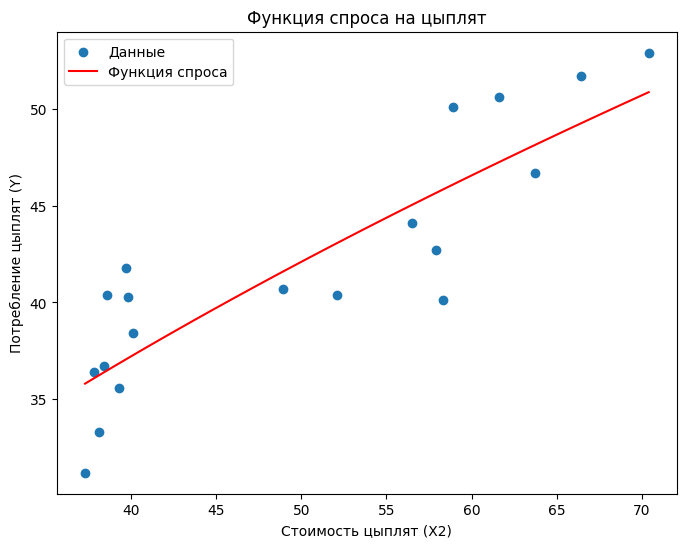

In [ ]:
#a1)
# Оценка модели
X = sm.add_constant(df['log_X2'])
Y = df['log_Y']
model = sm.OLS(Y, X).fit()

# Получение и вывод оцененных коэффициентов
b0_hat = np.exp(model.params['const'])
b2_hat = model.params['log_X2']

print("Оценка b0:", b0_hat)
print("Оценка b2:", b2_hat)

# Функция спроса
demand_function = b0_hat * x2_values**b2_hat

print(f"Уравнение функции спроса на цыплят: Y = {b0_hat:.2f} * X2^{b2_hat:.2f}")

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df['X2'], df['Y'], label='Данные')
plt.plot(x2_values, demand_function, label='Функция спроса', color='red')
plt.title('Функция спроса на цыплят')
plt.xlabel('Стоимость цыплят (X2)')
plt.ylabel('Потребление цыплят (Y)')
plt.legend()
plt.show()

### Интерпретация уравнения функции спроса на цыплят

Уравнение функции спроса на цыплят имеет вид:

$Y = 4.84 \cdot X_2^{0.55} $

где:
- $ Y $ представляет потребление цыплят.
- $X_2 $ представляет цену на цыплят.

#### Коэффициенты уравнения:

1. **Коэффициент $b_0$:**
   - Значение: 4.84.
   - **Интерпретация:** Это условное количество потребления цыплят, когда цена $X_2$ равна нулю. Представляет базовый уровень спроса.

2. **Коэффициент $b_2$:**
   - Значение: 0.55.
   - **Интерпретация:** Это степень, в которую возводится цена на цыплят. Увеличение цены влияет на потребление, и данная степень определяет характер этого воздействия. При сильном увеличении цены на цыплят можно ожидать, что потребление будет расти, но с убывающей скоростью. Это объясняется степенной зависимостью от цены.

#### Вывод:

Уравнение указывает на нелинейную зависимость между ценой на цыплят и потреблением. Увеличение цены влияет на потребление в соответствии с указанной степенью. Построенный график демонстрирует, как изменяется потребление при изменении цены на цыплят.


Оценка b0: 5.731563217205146
Оценка b1: 0.2849184376159877
Уравнение функции потребления цыплят: Y = 5.73 * X1^0.28


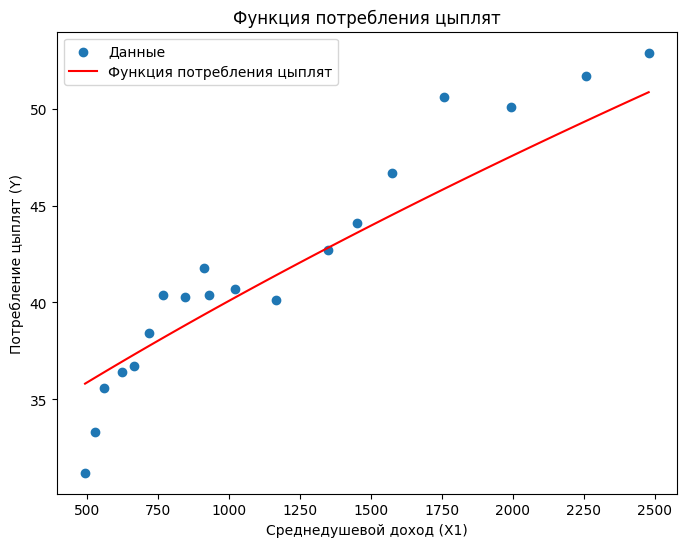

In [ ]:
#a2)
# Оценка модели
X = sm.add_constant(df['log_X1'])
Y = df['log_Y']
model = sm.OLS(Y, X).fit()

# Получение и вывод оцененных коэффициентов
b0_hat = np.exp(model.params['const'])
b1_hat = model.params['log_X1']

print("Оценка b0:", b0_hat)
print("Оценка b1:", b1_hat)

# Функция потребления
consumption_function = b0_hat * x1_values**b1_hat
print(f"Уравнение функции потребления цыплят: Y = {b0_hat:.2f} * X1^{b1_hat:.2f}")

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['Y'], label='Данные')
plt.plot(x1_values, demand_function, label='Функция потребления цыплят', color='red')
plt.title('Функция потребления цыплят')
plt.xlabel('Среднедушевой доход (X1)')
plt.ylabel('Потребление цыплят (Y)')
plt.legend()
plt.show()

### Интерпретация уравнения функции потребления цыплят

Уравнение функции потребления цыплят имеет вид:

$Y = 5.73 \cdot X_1^{0.28} $

где:
- $ Y $ представляет объем потребления цыплят.
- $ X_1 $ представляет среднедушевой доход.

#### Коэффициенты уравнения:

1. **Коэффициент $b_0$:**
   - Значение: 5.73.
   - **Интерпретация:** Это начальный объем потребления цыплят при среднедушевом доходе $(X_1)$, равном нулю или в базовых условиях.

2. **Коэффициент $b_1$:**
   - Значение: 0.28.
   - **Интерпретация:** Это степень, в которую возводится среднедушевой доход $(X_1)$. Увеличение дохода будет влиять на объем потребления, и данная степень определяет характер этого воздействия.так как данный коэффициент меньше 1, это указывает на убывающую скорость увеличения потребления при росте дохода.

#### Вывод:

Уравнение указывает на нелинейную зависимость между среднедушевым доходом и объемом потребления цыплят. Увеличение дохода влияет на объем потребления с убывающей скоростью, определенной степенью $b_1$. Построение графика этой функции позволит визуально представить, как изменяется объем потребления цыплят относительно среднедушевого дохода.


Оценка b0: 7.526900619148333
Оценка b1: 0.4161416088632488
Оценка b2: -0.30481650367128577
Уравнение функции спроса-потребления цыплят: Y = 7.53 * X1^0.42* X2^-0.30


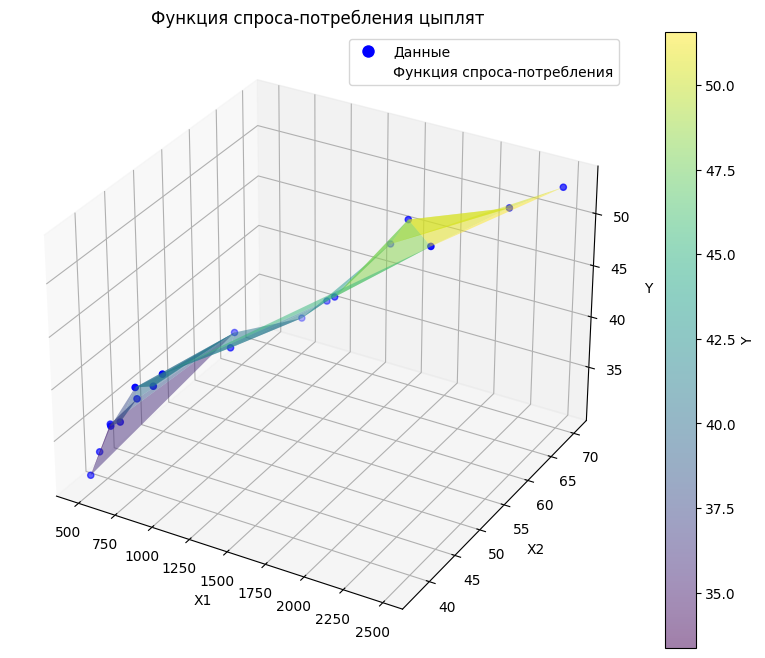

In [ ]:
#a3)
# Оценка модели
X = sm.add_constant(df[['log_X1', 'log_X2']])
Y = df['log_Y']
model = sm.OLS(Y, X).fit()

# Получение и вывод оцененных коэффициентов
b0_hat = np.exp(model.params['const'])
b1_hat = model.params['log_X1']
b2_hat = model.params['log_X2']

print("Оценка b0:", b0_hat)
print("Оценка b1:", b1_hat)
print("Оценка b2:", b2_hat)

# Создание сетки для всех комбинаций x1 и x2
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)

# Функция спроса-потребления
demand_consumption_function = b0_hat * x1_mesh**b1_hat * x2_mesh**b2_hat

print(f"Уравнение функции спроса-потребления цыплят: Y = {b0_hat:.2f} * X1^{b1_hat:.2f}* X2^{b2_hat:.2f}")

# Построение 3D-графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(df['X1'], df['X2'], df['Y'], label='Данные', color='blue')
surf = ax.plot_trisurf(df['X1'], df['X2'], df['Y'], cmap='viridis', alpha=0.5, label='Функция спроса-потребления')

# Добавление цветовой шкалы
fig.colorbar(surf, ax=ax, label='Y')

# Добавление легенды
custom_legend = [Line2D([0], [0], marker='o', color='w', label='Данные', markerfacecolor='blue', markersize=10),
                 Line2D([0], [0], linestyle='-', color='w', label='Функция спроса-потребления', markerfacecolor='black')]

ax.legend(handles=custom_legend)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Функция спроса-потребления цыплят')
plt.show()

plt.show()

In [ ]:
#a4)
# Оценка модели
X = sm.add_constant(df[['log_X2', 'log_X3', 'log_X4' ]])
Y = df['log_Y']
model = sm.OLS(Y, X).fit()

# Получение и вывод оцененных коэффициентов
b0_hat = np.exp(model.params['const'])
b2_hat = model.params['log_X2']
b3_hat = model.params['log_X3']
b4_hat = model.params['log_X4']

print("Оценка b0:", b0_hat)
print("Оценка b2:", b2_hat)
print("Оценка b3:", b3_hat)
print("Оценка b4:", b4_hat)

# Создание сетки для всех комбинаций x2, x3 и x4
x2_mesh, x3_mesh, x4_mesh = np.meshgrid(x2_values, x3_values, x4_values)

# Функция спроса с учетом цены на товары-заменители
demand_function_substitutes = b0_hat * x2_mesh**b2_hat * x3_mesh**b3_hat * x4_mesh**b4_hat

print(f"Уравнение функции спроса с учетом цены на товары-заменители: Y = {b0_hat:.2f} * X2^{b2_hat:.2f} * X3^{b3_hat:.2f} * X4^{b4_hat:.2f}")



Оценка b0: 10.126824720837007
Оценка b2: -0.48745437465629055
Оценка b3: 0.23741933716216224
Оценка b4: 0.4600528369732517
Уравнение функции спроса с учетом цены на товары-заменители: Y = 10.13 * X2^-0.49 * X3^0.24 * X4^0.46


In [ ]:
#b)

# Проведение теста Шапиро-Уилка
statistic_X1, p_value_X1 = shapiro(df['X1'])
statistic_X2, p_value_X2 = shapiro(df['X2'])
statistic_X3, p_value_X3 = shapiro(df['X3'])
statistic_X4, p_value_X4 = shapiro(df['X4'])

# Вывод результатов теста
print("Тест Шапиро-Уилка для X1: statistic =", statistic_X1, ", p-value =", p_value_X1)
print("Тест Шапиро-Уилка для X2: statistic =", statistic_X2, ", p-value =", p_value_X2)
print("Тест Шапиро-Уилка для X3: statistic =", statistic_X3, ", p-value =", p_value_X3)
print("Тест Шапиро-Уилка для X4: statistic =", statistic_X4, ", p-value =", p_value_X4)


Тест Шапиро-Уилка для X1: statistic = 0.896443247795105 , p-value = 0.04197002574801445
Тест Шапиро-Уилка для X2: statistic = 0.8548540472984314 , p-value = 0.008054640144109726
Тест Шапиро-Уилка для X3: statistic = 0.89530348777771 , p-value = 0.04003702849149704
Тест Шапиро-Уилка для X4: statistic = 0.8776261210441589 , p-value = 0.01952611841261387


 Примем общепринятый уровень значимости для этого типа тестов - 0.05, сравним результаты теста Шапиро-Уилка с выбранным уровнем значимости и заметим, что все четыре теста показывают низкие p-value, что может свидетельствовать о том, что данные не имеют нормальное распределение. Однако, стоит помнить, что результаты тестов могут быть чувствительны к размеру выборки, а в нашем случае выборка очень мала. Сославшись на это, для Х1 и Х3 можно было бы не проводить применить преобразования Бокса-Кокса, но мы проведем.

In [ ]:
#с)
# Применение преобразования Бокса-Кокса для данных, которые не прошли тест Шапиро-Уилка
data_X1_transformed, lambda_X1 = boxcox(df['X1'])
data_X2_transformed, lambda_X2 = boxcox(df['X2'])
data_X3_transformed, lambda_X3 = boxcox(df['X3'])
data_X4_transformed, lambda_X4 = boxcox(df['X4'])

# Вывод оптимальных значений параметра λ:
print("Оптимальное значение λ для X1:", lambda_X1)
print("Оптимальное значение λ для X2:", lambda_X2)
print("Оптимальное значение λ для X3:", lambda_X3)
print("Оптимальное значение λ для X4:", lambda_X4)


# Теперь можем использовать преобразованные данные для анализа
# Например, применим тест Шапиро-Уилка к преобразованным данным
statistic_transformed_X1, p_value_transformed_X1 = shapiro(data_X1_transformed)
statistic_transformed_X2, p_value_transformed_X2 = shapiro(data_X2_transformed)
statistic_transformed_X3, p_value_transformed_X3 = shapiro(data_X3_transformed)
statistic_transformed_X4, p_value_transformed_X4 = shapiro(data_X4_transformed)

# Вывод результатов теста на нормальность для преобразованных данных
print("Тест Шапиро-Уилка для преобразованных данных X1: statistic =", statistic_transformed_X1, ", p-value =", p_value_transformed_X1)
print("Тест Шапиро-Уилка для преобразованных данных X2: statistic =", statistic_transformed_X2, ", p-value =", p_value_transformed_X2)
print("Тест Шапиро-Уилка для преобразованных данных X3: statistic =", statistic_transformed_X3, ", p-value =", p_value_transformed_X3)
print("Тест Шапиро-Уилка для преобразованных данных X4: statistic =", statistic_transformed_X4, ", p-value =", p_value_transformed_X4)

Оптимальное значение λ для X1: -0.30309360956397147
Оптимальное значение λ для X2: -0.7909749202080213
Оптимальное значение λ для X3: -0.2513261638346239
Оптимальное значение λ для X4: -0.5852037748679675
Тест Шапиро-Уилка для преобразованных данных X1: statistic = 0.9598411917686462 , p-value = 0.569256603717804
Тест Шапиро-Уилка для преобразованных данных X2: statistic = 0.8407939672470093 , p-value = 0.004768925718963146
Тест Шапиро-Уилка для преобразованных данных X3: statistic = 0.9084967374801636 , p-value = 0.06947548687458038
Тест Шапиро-Уилка для преобразованных данных X4: statistic = 0.9304439425468445 , p-value = 0.17648252844810486


Для преобразованных данных X2  p-value все еще меньше 0.05, что может свидетельствовать о том, что данные не полностью соответствуют нормальному распределению.

In [ ]:
#d)
# Проведение критерия Манна-Уитни
statistic, p_value = mannwhitneyu(df['X3'], df['X4'])

# Вывод результатов теста
print("Статистика U =", statistic)
print("p-value =", p_value)

Статистика U = 102.0
p-value = 0.022774865372337656


Уровень значимости p-value равен 0.0228, что меньше часто используемого порогового значения 0.05. Таким образом, на уровне значимости 0.05 мы отвергаем нулевую гипотезу о том, что нет статистически значимых различий между X3 и X4.

Интерпретация: Есть статистически значимые различия между X3 и X4. Таким образом, на основе теста Манна-Уитни у нас есть достаточные доказательства для утверждения, что распределения X3 и X4 различны.

In [ ]:
#e)
# Проведение критерия Флигнера-Клипера
statistic_fligner, p_value_fligner = fligner(df['X2'], df['X3'])

# Проведение критерия Стьюдента с учетом результатов Флигнера-Клипера
# Если p-value Флигнера-Клипера < 0.05 (уровень значимости), используем параметр equal_var=False
# Иначе, используем параметр equal_var=True
if p_value_fligner < 0.05:
    equal_var = False
else:
    equal_var = True

# Проведение критерия Стьюдента
statistic_t, p_value_t = ttest_ind(df['X2'], df['X3'], equal_var=equal_var)

# Вывод результатов тестов
print("Критерий Флигнера-Клипера:")
print("Статистика =", statistic_fligner)
print("p-value =", p_value_fligner)
print("\nКритерий Стьюдента:")
print("Статистика t =", statistic_t)
print("p-value =", p_value_t)

Критерий Флигнера-Клипера:
Статистика = 16.797459660607196
p-value = 4.158894013328987e-05

Критерий Стьюдента:
Статистика t = -5.937606839472742
p-value = 5.474644516999182e-06


**Критерий Флигнера-Клипера:**
- Статистика = 16.7975
- p-value = 4.1589e-05 (очень маленькое число)

**Критерий Стьюдента:**
- Статистика t = -5.9376
- p-value = 5.4746e-06 (очень маленькое число)

**Интерпретация:**

1. **Критерий Флигнера-Клипера:**
   - Так как p-value крайне маленькое (меньше выбранного уровня значимости 0.05), мы отвергаем нулевую гипотезу о равенстве дисперсий. Таким образом, дисперсии между X2 и X3 статистически различны.

2. **Критерий Стьюдента:**
   - Так как p-value также крайне маленькое (меньше 0.05), мы отвергаем нулевую гипотезу о равенстве средних значений. Это указывает на статистически значимые различия между X2 и X3.

Итак, на основе обоих тестов есть статистически значимые различия между X2 и X3, учитывая различие в дисперсиях, как указано Критерием Флигнера-Клипера. Учитывая результаты Критерия Стьюдента, отрицательное значение t-статистики также указывает на то, что среднее значение X2 меньше, чем среднее значение X3.


### Задание 2
#### По данным из файла «задание2.xlsx» показателей деятельности 50 фирм, оказывающих фото- и видео-услуги в городе N, за 2019 г. рассмотреть возможности оценивания нелинейной, в частности полиномиальной, регрессии прибыльности вложений в оборудование (profitability, %) на показатели среднего числа сотрудников на один проект (staff), среднемесячного числа проектов (projects), доли расходов на рекламу и продвижение своего бренда (adverts, %).
#### а) Найти степень полинома, при которой коэффициент детерминации оказывается близким к 1.


#### b) Показать, что результат достигнут за счет переобучения модели.



#### с) Выбрать оптимальную степень полинома, в том числе с содержательной точки зрения, предполагая, что фирмы можно считать однородными по прочим возможным показателям их деятельности.


a) Оптимальная степень полинома для высокого R^2: 3
   Наилучший коэффициент детерминации (R^2) на тестовой выборке: 0.7090423318964736


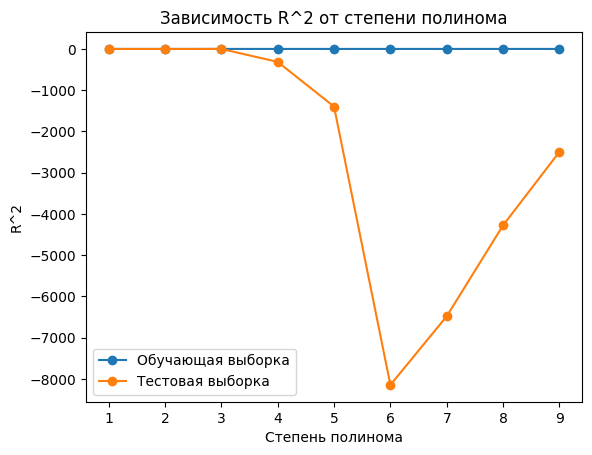

c) Оптимальная степень полинома с содержательной точки зрения: 3
   Наилучший коэффициент детерминации (R^2) на тестовой выборке: 0.7090423318964736


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel
data = pd.read_excel("задание2.xlsx")

# Подготовка данных
X = data[['staff', 'projects', 'adverts']]
y = data['profitability']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для обучения полиномиальной регрессии, оценки R^2 и предсказания
def train_and_evaluate_polynomial_regression(degree, X_train, X_test, y_train, y_test):
    # Преобразование признаков в полиномиальные
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Обучение линейной регрессии на полиномиальных признаках
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Предсказание на тестовой и обучающей выборках
    y_test_pred = model.predict(X_test_poly)
    y_train_pred = model.predict(poly.transform(X_train))

    # Оценка R^2
    r2_test = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)

    return r2_train, r2_test

# a) Найти степень полинома, при которой коэффициент детерминации близок к 1
best_degree_high_r2 = None
best_r2_high = -np.inf

for degree in range(1, 10):
    r2_train, r2_test = train_and_evaluate_polynomial_regression(degree, X_train, X_test, y_train, y_test)
    if r2_test > best_r2_high:
        best_r2_high = r2_test
        best_degree_high_r2 = degree

# Вывести результаты
print(f"a) Оптимальная степень полинома для высокого R^2: {best_degree_high_r2}")
print(f"   Наилучший коэффициент детерминации (R^2) на тестовой выборке: {best_r2_high}")

# b) Показать, что результат достигнут за счет переобучения модели
degrees = range(1, 10)
r2_train_values = []
r2_test_values = []

for degree in degrees:
    r2_train, r2_test = train_and_evaluate_polynomial_regression(degree, X_train, X_test, y_train, y_test)
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)

# Вывести результаты
plt.plot(degrees, r2_train_values, marker='o', label='Обучающая выборка')
plt.plot(degrees, r2_test_values, marker='o', label='Тестовая выборка')
plt.title('Зависимость R^2 от степени полинома')
plt.xlabel('Степень полинома')
plt.ylabel('R^2')
plt.legend()
plt.show()

# c) Выбрать оптимальную степень полинома с содержательной точки зрения
# В данном случае, просто будем считать, что лучшая степень та, при которой R^2 максимальный
best_degree_optimal = None
best_r2_optimal = -np.inf

for degree in range(1, 10):
    r2_train, r2_test = train_and_evaluate_polynomial_regression(degree, X_train, X_test, y_train, y_test)
    if r2_test > best_r2_optimal:
        best_r2_optimal = r2_test
        best_degree_optimal = degree

# Вывести результаты
print(f"c) Оптимальная степень полинома с содержательной точки зрения: {best_degree_optimal}")
print(f"   Наилучший коэффициент детерминации (R^2) на тестовой выборке: {best_r2_optimal}")




R^2 на обучающей выборке значительно выше, чем на тестовой, это признак переобучения.

### Задание 3
#### Применить метод главных компонент для понижения размерности данных о результативности деятельности российских вузов. Данные в файле «задание3.xlsx»
#### а) Определить минимальное количество компонент, которые необходимо использовать для сохранения 75% первоначальной информации.

#### b) Выписать формулы зависимости главных компонент из пункта а) от первоначальных данных.

In [ ]:
import pandas as pd

# Загрузка данных из файла Excel
data = pd.read_excel("задание3.xlsx")

# Вывод первых нескольких строк данных для ознакомления
print(data.head())


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Выделение признаков и масштабирование данных
#X = data.drop('ВУЗ', axis=1)  # Предполагая, что 'ВУЗ' - это название вуза и не является признаком
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Вычисление объясненной дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Вывод объясненной дисперсии для каждой компоненты
print("Объясненная дисперсия для каждой компоненты:")
print(explained_variance_ratio)

# Вычисление кумулятивной суммы объясненной дисперсии
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Находим индекс, на котором кумулятивная дисперсия превышает 75%
min_components = np.argmax(cumulative_variance_ratio >= 0.75) + 1

# Вывод минимального количества компонент
print(f"Минимальное количество компонент для сохранения 75% первоначальной информации: {min_components}")

# Получение матрицы главных компонент
principal_components = pca.components_

# Вывод формул зависимости главных компонент от исходных данных
for i in range(min_components):
    formula = " + ".join([f"{round(weight, 3)} * {feature}" for weight, feature in zip(principal_components[i], X.columns)])
    print(f"Главная компонента {i+1}: PC{i+1} = {formula}")


  Unnamed: 0   Unnamed: 1                                         Unnamed: 2  \
0         id  Ведущий вуз  Средний балл ЕГЭ студентов, принятых по резуль...   
1         id           x1                                                 x2   
2         96            0                                              60.96   
3         97            0                                              55.02   
4         99            0                                              69.08   

                                          Unnamed: 3  \
0  Количество цитирований публикаций, изданных за...   
1                                                 x3   
2                                               2.68   
3                                               7.42   
4                                               51.5   

                                          Unnamed: 4  \
0  Количество цитирований публикаций, изданных за...   
1                                                 x4   
2             

### Задание 4
#### По данным из файла «задание4.xls» обучить модель логистической регрессии с целью прогнозирования увольнения сотрудника.
#### а) Отобрать переменные, которые будут включаться в модель. Обосновать сделанный выбор. Обучить модель логистической регрессии. Дать интерпретацию полученных результатов.

#### b) Привести матрицу ошибок, рассмотреть различные метрики качества модели.

#### b) c) Построить ROC-кривую.

Описание переменных:
target – сотрудник уволится в следующем году (0-нет, 1-да)\
age-возраст\
educ- образование (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)\
work_exp – стаж работы (лет)\
interest – оценка сотрудником интереса к работе (от 0 до 10)\
coffee- среднее количество чашек кофе, выпиваемых сотрудником за рабочий день\
boss_educ -образование руководителя (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)\
passport- наличие загранпаспорта у сотрудника (1-есть, 0 -нет)\
green -степень озеленения офиса (от 1 до 5)\
floor – этаж работы\
children – количество детей у сотрудника\
climate- удовлетворенность рабочей атмосферой (от 0 до 4)\
offhour – наличие переработок (1-да, 0 -нет)\
dist – расстояние до работы\
salary – удовлетворенность заработной платой (1-да, 0 -нет)\
height- рост сотрудника\
lunch- средняя цена бизнес-ланча в офисе


   target  age  educ  work_exp  interest  coffee  boss_educ  passport  green  \
0       0   50     4        27         8     1.3          1         0      2   
1       0   30     3        10         0     0.0          6         1      2   
2       0   43     3        22         7     1.9          6         1      1   
3       0   58     3        31         7     2.0          4         0      3   
4       1   40     3        23         7     0.0          6         1      3   

   floor  children  climate  offhour  dist  salary  heigh  lunch  
0      3         2        0        0  10.6       1    176    226  
1      3         0        0        0  11.5       0    186    226  
2      5         0        3        0  12.8       1    166    238  
3      3         1        1        0  15.2       1    180    216  
4      2         0        0        0  16.1       1    180    286  


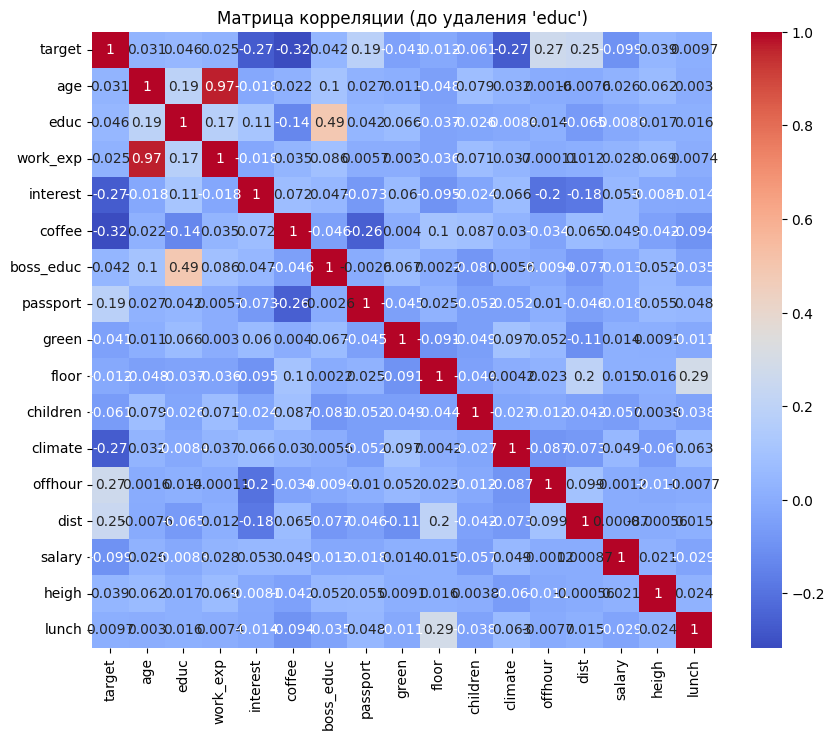

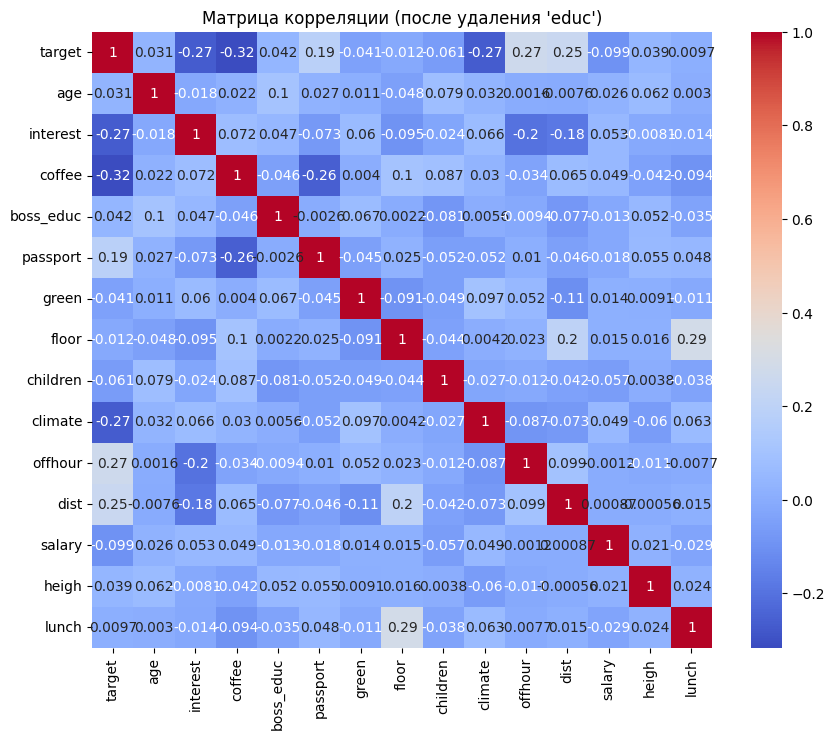

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Матрица ошибок:
[[107  25]
 [ 32  33]]

Классификационный отчет:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       132
           1       0.57      0.51      0.54        65

    accuracy                           0.71       197
   macro avg       0.67      0.66      0.66       197
weighted avg       0.70      0.71      0.71       197



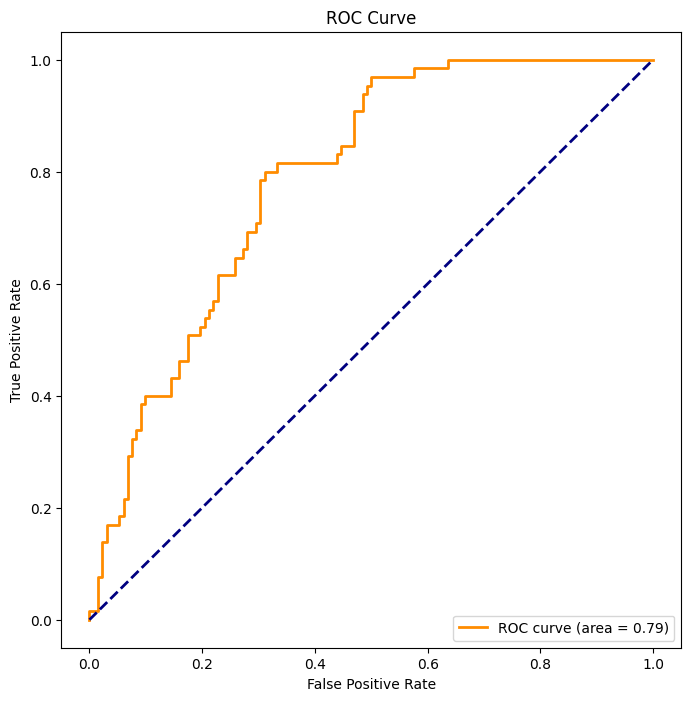

In [11]:
# Импортируем необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузим данные из файла
data = pd.read_excel("задание4.xls")

# Посмотрим на первые несколько строк данных, чтобы понять структуру
print(data.head())

# Рассчитаем и отобразим первую матрицу корреляции для удаления некоторых из признаков которые показывают сильную корреляцию
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Матрица корреляции (до удаления 'educ')")
plt.show()

# Удалим коррелирующий признак 'educ' и 'floor'
data = data.drop(columns=['educ', 'work_exp'])

# Рассчитаем и отобразим вторую матрицу корреляции
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Матрица корреляции (после удаления 'educ')")
plt.show()
# Отбираем переменные для модели
# В данном примере выберем все переменные, кроме 'target' (целевая переменная)
X = data.drop(columns=['target'])
y = data['target']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Оцениваем качество модели
# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

# Классификационный отчет
class_report = classification_report(y_test, y_pred)
print("\nКлассификационный отчет:")
print(class_report)

# ROC-кривая и площадь под ней
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()